!kaggle competitions download -c titanic

## Project Planning

* Understand the data behabior <p>
  1 Histograms<p>
  2 Value counts <p>
  3 Missing data<p>
  4 correlations of some fetures
* Explore interesting themes <p>
  1 Rich people survive<p>
  2 by locations<p>
  3 Age catterplot with ticket price<p>
  4 young and rich variable<p>
  5 Total Spend<p>
* Feature Engineering
* Proccess data together or use transformer ??
* Use feature augmentation ??
* Scaling
* Understand the limitations of the data
* Model base line
* Model benchmark

# Type of data

### 1 Numerical Data
* Histograms to undestand distributions
* Correlations plot
* Pivot tables tables comparing survival rates

### 2 Categorical Data
* Made barchars to understand balance between classes
* Made pivot tables to understand relationship with survival

In [116]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import random
import time
from tqdm import tqdm
import IPython.display as ipd
import seaborn as sns
rcParams['figure.figsize'] = 20, 5
%matplotlib inline

In [81]:
DBtrain = pd.read_csv('dataset/train.csv')
DBtest = pd.read_csv('dataset/test.csv')
DBtrain.info(verbose=True)
DBtrain.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
# We remove PassengerID and names, because are ramdon varaibels
DBtrain.drop(columns=['PassengerId', 'Name'], inplace=True) 
DBtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
# Analising the data we can see that the categorical and numerical data are just like this
DBtrain_num = ['Age', 'SibSp', 'Parch', 'Fare']
DBtrain_cat = ['Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived','Pclass']

### Histogram for numerical Data

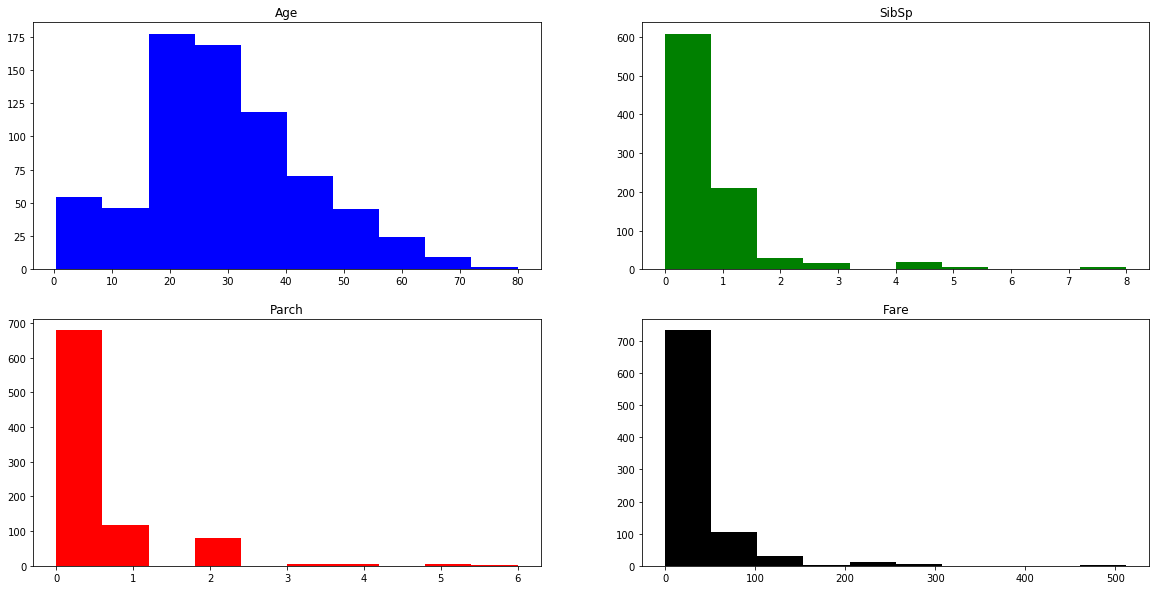

In [114]:
rcParams['figure.figsize'] = 20, 10
fig, axes = plt.subplots(nrows=2, ncols=2)
colors = ['b', 'g', 'r', 'k']
n_bins = 10
for n, zippack in enumerate(zip(axes.flatten(), DBtrain_num)):
    axhist , i_label = zippack
    axhist.hist(DBtrain[i_label], histtype='bar',color=colors[n], stacked=True ,density =None)
    axhist.set_title(i_label)
    

### Correlation between numerical features

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


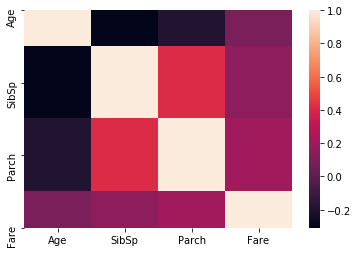

In [124]:
coor_matrix = DBtrain[DBtrain_num].corr()
print(coor_matrix)
_ = sns.heatmap(coor_matrix)